In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
model = ChatGroq(model = "deepseek-r1-distill-llama-70b",
    temperature=0,
    max_tokens=None,
    reasoning_format="parsed",
    timeout=None,
    max_retries=2)

In [5]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [6]:
def create_outline(state: BlogState) -> BlogState:
    # title
    title = state['title']

    # call llm to get outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [7]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the following outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [8]:
# graph
graph = StateGraph(BlogState)

# nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)

# edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", END)

workflow = graph.compile()

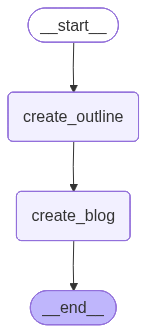

In [9]:
workflow

In [10]:
initial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': "**Blog Outline: The Rise of AI in India**\n\n---\n\n**1. Introduction**\n   - **Global Context of AI**: Brief overview of AI's growth worldwide.\n   - **Focus on India**: Transition to India's unique position and potential in AI.\n\n**2. Current State of AI in India**\n   - **Investments and Growth**: Mention specific investments, e.g., INR 1,300 crore allocation.\n   - **Government Initiatives**: Discuss NITI Aayog's National Strategy and the AI Task Force.\n   - **Industry Applications**: Highlight AI adoption in sectors like healthcare, education, and finance.\n\n**3. Factors Driving AI Adoption in India**\n   - **Government Support**: Initiatives like Digital India and Make in India.\n   - **IT Industry Strength**: Role of India's robust IT sector.\n   - **Startup Ecosystem**: Impact of Startup India and booming AI startups.\n   - **Demographic Advantage**: Young population and digital natives.\n   - **Digital Infrastructure**: Increasin

In [11]:
print(final_state['outline'])

**Blog Outline: The Rise of AI in India**

---

**1. Introduction**
   - **Global Context of AI**: Brief overview of AI's growth worldwide.
   - **Focus on India**: Transition to India's unique position and potential in AI.

**2. Current State of AI in India**
   - **Investments and Growth**: Mention specific investments, e.g., INR 1,300 crore allocation.
   - **Government Initiatives**: Discuss NITI Aayog's National Strategy and the AI Task Force.
   - **Industry Applications**: Highlight AI adoption in sectors like healthcare, education, and finance.

**3. Factors Driving AI Adoption in India**
   - **Government Support**: Initiatives like Digital India and Make in India.
   - **IT Industry Strength**: Role of India's robust IT sector.
   - **Startup Ecosystem**: Impact of Startup India and booming AI startups.
   - **Demographic Advantage**: Young population and digital natives.
   - **Digital Infrastructure**: Increasing internet and smartphone penetration.

**4. Impact of AI Acros

In [13]:
print(final_state['content'])

**The Rise of AI in India: A Comprehensive Overview**

**Introduction**

Artificial Intelligence (AI) is revolutionizing industries worldwide, from healthcare to finance, by enabling machines to perform tasks that typically require human intelligence. As a transformative force, AI is reshaping global economies, and India is no exception. With its vast population and growing digital infrastructure, India is poised to harness AI's potential to drive economic growth and social development. This blog explores AI's rise in India, examining its current state, government initiatives, startup ecosystem, educational impact, job market dynamics, ethical considerations, and future prospects.

**Current State of AI in India**

AI adoption in India is gaining momentum across sectors, with healthcare, agriculture, education, and finance leading the charge. In healthcare, AI aids in disease diagnosis and personalized treatment plans. In agriculture, AI optimizes crop yields and resource use. Educatio